In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *
from MicrogridPSO_pareto_animation import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# inspect function
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))
print(dir(Make_animation))

In [ ]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.8,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })

# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11,
                                                             33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 129,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [0]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
# len(PSO.Target_input.index)

In [ ]:
%%time

#計算結果を実行
iterations_PSO(PSO)

In [ ]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('Result/PSO_result_no_income.csv',encoding="SHIFT-JIS")  
df

In [ ]:
# plot_list
best_cost_list = np.array(PSO.best_cost_list)
gbest_list = np.array(PSO.global_best_list)
iteration_list = np.array(PSO.iteration_list)
plot_list = pd.DataFrame({'iteration': np.array(PSO.iteration_list)+1,
                          'cost': np.array(PSO.best_cost_list)})

In [ ]:
PSO.best["variables"]

In [ ]:
plot_list

In [ ]:
plot_list.plot(x="iteration", y="cost", title='Total cost in each iteration')
plt.savefig('Result/Total cost in each iteration.png')

In [ ]:
COST_PV = (PSO.best["variables"]["pv_cap_max"] / 1000) * (np.array(PSO.initial_cost_parameters["It_PV_1kW[yen/year]"]
                                                                   ) + np.array(PSO.initial_cost_parameters["Mt_PV_1kW[yen/year]"]))
COST_Wind = (PSO.best["variables"]["wind_cap_max"]
             * (np.array(PSO.initial_cost_parameters["It_Wind_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Wind_1kW[yen/year]"])))
COST_Diesel = (PSO.best["variables"]["diesel_max"]
               * (np.array(PSO.initial_cost_parameters["It_Diesel_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Diesel_1kW[yen/year]"]))) + np.array(PSO.best["variables"]["Diesel_Cf_sum"] * 20)
COST_Battery = PSO.best["variables"]["battery_cap_max"] * (np.array(
    PSO.initial_cost_parameters["It_Battery_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Battery_1kW[yen/year]"]))

COST = {
    "COST PV": np.round(COST_PV, 2),
    "TOTAL COST PV": np.round(np.sum(COST_PV), 2),
    "LCOE PV": np.round(np.sum(COST_PV)/(20*PSO.best["variables"]["pv_power_sum"]), 2),
    "COST Wind": np.round(COST_Wind, 2),
    "TOTAL COST Wind": np.round(np.sum(COST_Wind), 2),
    "LCOE WIND": np.round(np.sum(COST_Wind)/(20*PSO.best["variables"]["wind_power_sum"]), 2),
    "COST DIESEL": np.round(COST_Diesel, 2),
    "TOTAL COST DIESEL": np.round(np.sum(COST_Diesel), 2),
    "LCOE DIESEL": np.round(np.sum(COST_Diesel)/(20*PSO.best["variables"]["diesel_power_sum"]), 2),
    "COST BATTERY": np.round(COST_Battery, 2),
    "TOTAL COST BATTERY": np.round(np.sum(COST_Battery), 2),
    "LCOE BATTERY": np.round(np.sum(COST_Battery)/(20*PSO.best["variables"]["battery_discharging_power_sum"]), 2),
}

In [ ]:
# 計算結果テキストファイルの作成
f = open('Result/PSO_result_parameters.txt', 'w')  # 書き込みモードで開く
f_content = 'LCOE:'+str(np.sum(PSO.best['SCL'])/np.sum(PSO.best['SEL']))+'\nglobal_best_position:'+str(PSO.best['global_best_position'])+'\nglobal_best_fitness_value: '+str(PSO.best['global_best_fitness_value'])+"\nCOST:"+str(COST)+"\nPSO.best[variables]:"\
    + str(PSO.best["variables"]) + '\nPSO.initial_cost_parameters:' + str(
        PSO.initial_cost_parameters)+'\nSCL:'+str(PSO.best['SCL'])+'\nSEL:'+str(PSO.best['SEL'])
f.write(f_content)  # 引数の文字列をファイルに書き込む
f.close()  # ファイルを閉じる

ValueError: Invalid file object: <_io.BufferedReader name=48>

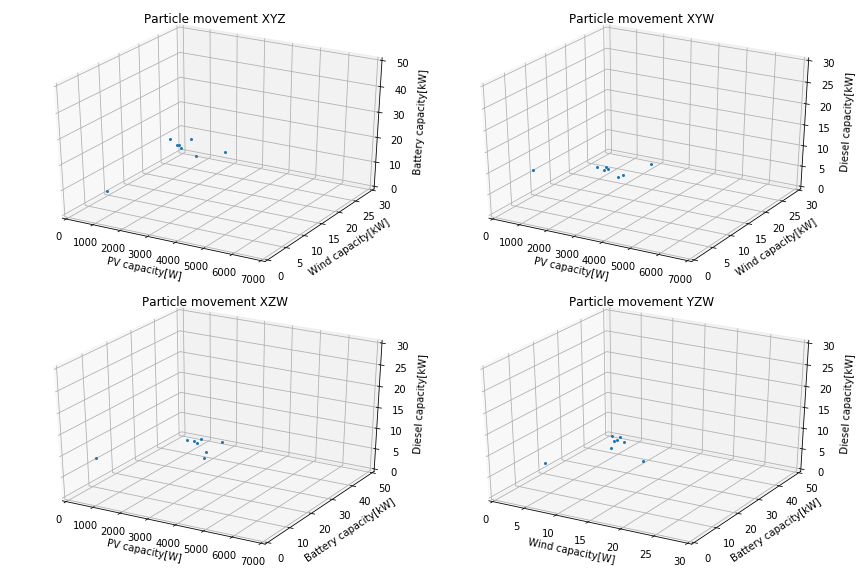

In [2]:
#アニメーションの書き出し
Make_animation("Result/all_particle_data.npy")

In [ ]:
PSO.best['SCL']

In [ ]:
PSO.best['SEL']

In [ ]:
dir(PSO)